In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import vr2p
from skimage.exposure import rescale_intensity
from matplotlib import pyplot as plt
from matplotlib import cm,colors
from matplotlib.patches import Rectangle


# main parameters

In [32]:
animal = 'A7'
pix_size = [1.333,2] #xy

fov_size_mm = 1.55
fov_origin_mm = [0.1,0.05]
img_type = 'mean_img'
crop_size_mm = 0.125

# load data.
data = vr2p.ExperimentData(f'gs://linear-2ac/Tyche-{animal} Set A-E/')

# show main fov with croped region

In [9]:

def show_overview_crop(session,disp_range, img_type, fov_size_mm, fov_origin_mm, crop_size_mm,crop_origin_mm,show_crop=True):
    fov_im = rescale_intensity(data.images.original[session][img_type],
                                in_range = tuple(disp_range), out_range=(0,1)).astype(float)
    extent=[0,(fov_im.shape[1]*pix_size[0])/1000, 0,(fov_im.shape[0]*pix_size[1])/1000]
    # fov crop in x -y
    fov_mm = [[fov_origin_mm[0],fov_origin_mm[0] + fov_size_mm],
              [fov_origin_mm[1],fov_origin_mm[1] + fov_size_mm]] 
    if show_crop:
        crop_mm = [[crop_origin_mm[0],crop_origin_mm[0] + crop_size_mm],
                  [crop_origin_mm[1],crop_origin_mm[1] + crop_size_mm]] 
    #plot
    fig = plt.figure(figsize=(2.5,2.5),dpi=300)
    ax = fig.add_subplot(1, 1, 1)

    # plot img.
    ax.imshow( fov_im, origin='lower',extent=extent, 
              interpolation='none',cmap='gray', vmin=0, vmax=1) # correct non uniform aspect ratio.
    # format.
    ax.axis('off')
    ax.set_xlim(fov_mm[0])
    ax.set_ylim(fov_mm[1])

    # set title
    title_str = f'fov size: {fov_size_mm} mm\n'
    title_str += f'{img_type} range: {disp_range[0]}-{disp_range[1]}\n'
    fig.suptitle(title_str,fontsize = 3)
    if show_crop:
        ax.add_patch(Rectangle((crop_mm[0][0],crop_mm[1][0]),
                                   crop_mm[0][1]-crop_mm[0][0], 
                                   crop_mm[1][1]-crop_mm[1][0],
                                  facecolor='none', edgecolor='white',linewidth=0.5,))
# original or geistered
def show_crop_img(session, session_type,  disp_range, img_type, crop_size_mm, crop_origin_mm):
    """
        session_type = 'original' or 'registered'
    """
    #plot
    fig = plt.figure(figsize=(2.5,2.5),dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    # show image.
    img_data = getattr(data.images,session_type)[session][img_type]
    im = rescale_intensity(img_data, in_range = tuple(disp_range), out_range=(0,1)).astype(float)
    extent=[0,(im.shape[1]*pix_size[0])/1000, 0,(im.shape[0]*pix_size[1])/1000]
    ax.imshow( im, origin='lower',extent=extent, 
              interpolation='none',cmap='gray', vmin=0, vmax=1) # correct non uniform aspect ratio.
    # crop area
    crop_ax(ax, crop_size_mm, crop_origin_mm)
    # set title
    title_str = f'session: {session}\n'
    title_str += f'fov size: {crop_size_mm} mm\n'
    title_str += f'{img_type} range: {disp_range[0]}-{disp_range[1]}\n'
    fig.suptitle(title_str,fontsize = 3)
    
def show_session_overlay(session_type, session_1,session_2, disp_range_1,disp_range_2, crop_size_mm, crop_origin_mm):
    # create plot.
    fig = plt.figure(figsize=(2.5,2.5),dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    # grab data.
    img_data = getattr(data.images,session_type)
    im2 = array2rgb( img_data[session_1][img_type], disp_range_1,gencm((0,1,0)))   
    im1 = array2rgb( img_data[session_2][img_type], disp_range_2,gencm((1,0,1)))

    extent=[0,(im1.shape[1]*pix_size[0])/1000, 0,(im1.shape[0]*pix_size[1])/1000]
    ax.imshow( im1+im2, origin='lower',extent=extent, 
              interpolation='none',cmap='gray', vmin=0, vmax=1) # correct non uniform aspect ratio.
    ax.set_axis_off()
    # crop.
    crop_ax(ax, crop_size_mm, crop_origin_mm)
    # set title
    title_str = f'sessions: {session_1} (magenta),{session_2} (green) ({session_type}) \n'
    title_str += f'fov size: {crop_size_mm} mm\n'
    title_str += f'{img_type} range green: {disp_range_1[0]}-{disp_range_1[1]}\n'
    title_str += f'{img_type} range magenta: {disp_range_2[0]}-{disp_range_2[1]}\n'
    fig.suptitle(title_str,fontsize = 3)
    
def show_all_panels( session_1, session_2, disp_range_1, disp_range_2, crop_origin_mm):

    # overview.
    show_overview_crop(session = session_1, disp_range=disp_range_1, img_type = 'mean_img' ,
                           fov_size_mm = fov_size_mm,  fov_origin_mm = fov_origin_mm,
                           crop_size_mm = crop_size_mm, crop_origin_mm = crop_origin_mm)
    # crops before.
    show_crop_img(session=session_1, session_type = 'original',
                  disp_range=disp_range_1, img_type = img_type,
                  crop_size_mm = crop_size_mm, crop_origin_mm = crop_origin_mm)
    show_crop_img(session=session_2, session_type = 'registered',
                  disp_range=disp_range_2, img_type = img_type,
                  crop_size_mm = crop_size_mm, crop_origin_mm = crop_origin_mm)
    # overlay before after.
    show_session_overlay(session_type =  'original', session_1 = session_1,session_2 = session_2, 
                         disp_range_1 = disp_range_1, disp_range_2 = disp_range_2,
                        crop_size_mm = crop_size_mm, crop_origin_mm = crop_origin_mm)
    show_session_overlay(session_type =  'registered', session_1 = session_1, session_2 = session_2, 
                         disp_range_1 = disp_range_1, disp_range_2 = disp_range_2,
                        crop_size_mm = crop_size_mm, crop_origin_mm = crop_origin_mm)    
    
def array2rgb( array, disp_range,cmap):
    array = rescale_intensity(array,in_range = tuple(disp_range),out_range=(0,255)).astype(np.uint8)
    return np.uint8(cmap(array)*255)
def gencm(end_color):
    sel_colors = [(0, 0, 0), end_color] 
    return colors.LinearSegmentedColormap.from_list("Custom", sel_colors, N=256)
def crop_ax(ax, crop_size_mm, crop_origin_mm):
    crop_mm = [[crop_origin_mm[0],crop_origin_mm[0] + crop_size_mm],
              [crop_origin_mm[1],crop_origin_mm[1] + crop_size_mm]] 
    ax.axis('off')
    ax.set_xlim(crop_mm[0])
    ax.set_ylim(crop_mm[1])
    

# show general overview with out crop region

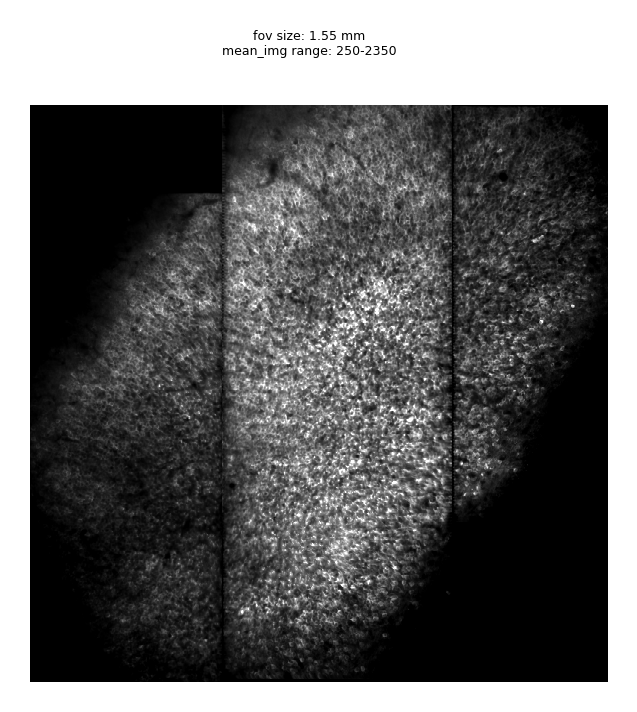

In [11]:
# overview.
show_overview_crop(session = 2, disp_range=[250,2350], img_type = 'mean_img' ,
                       fov_size_mm = 1.55,  fov_origin_mm = [0.1,0.05],
                       crop_size_mm = None, crop_origin_mm = None, show_crop = False)

# Crop region 1

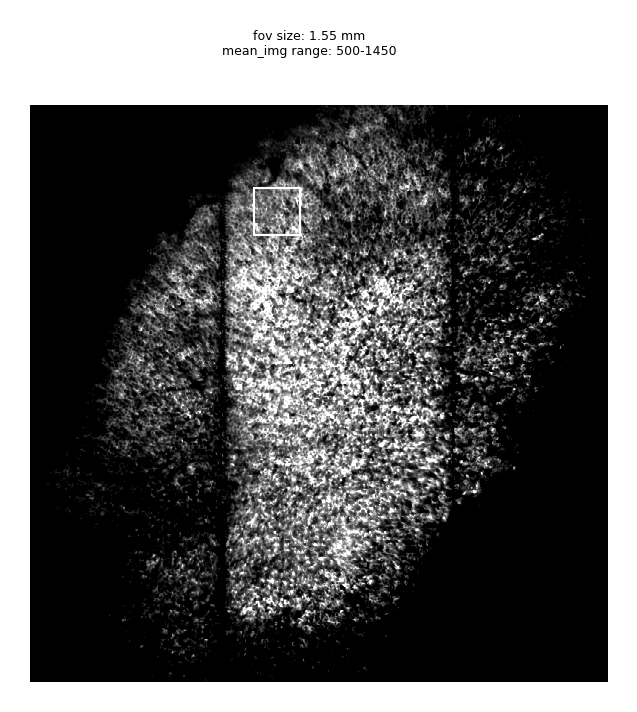

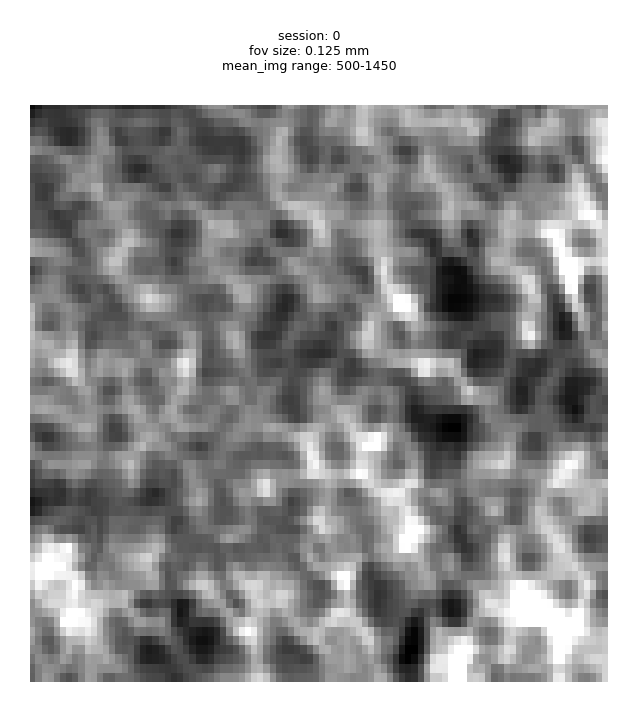

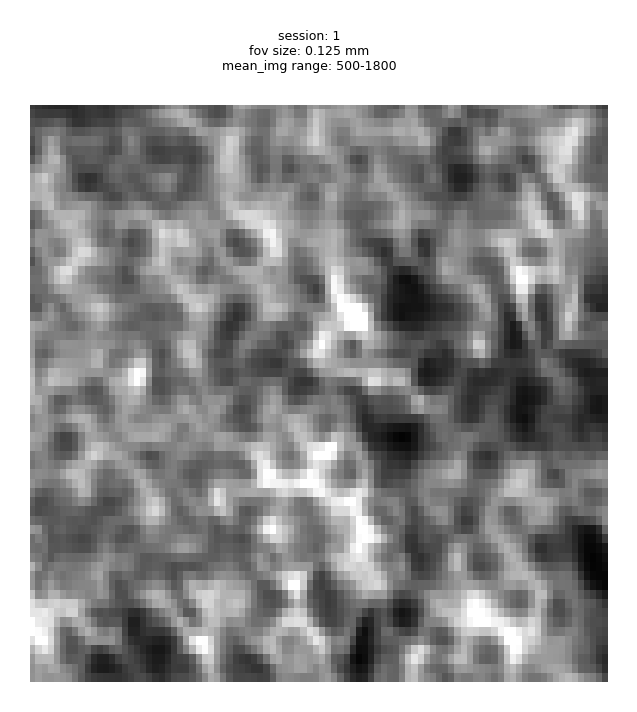

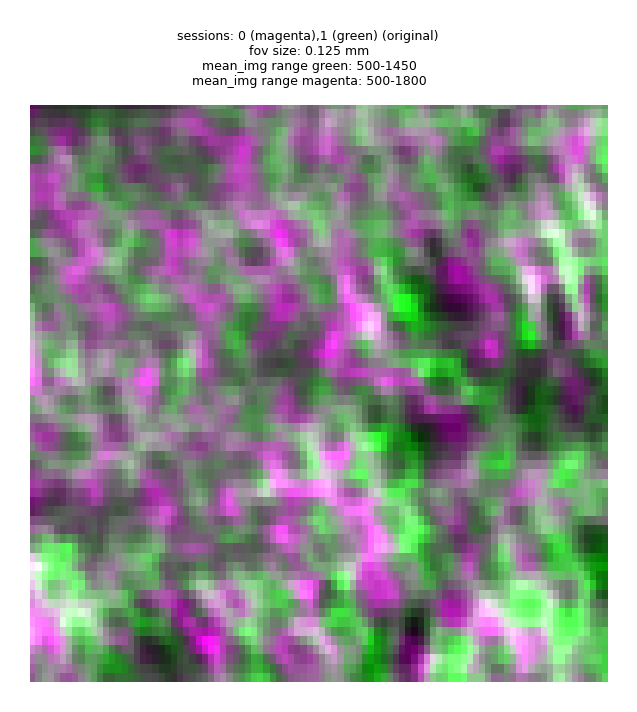

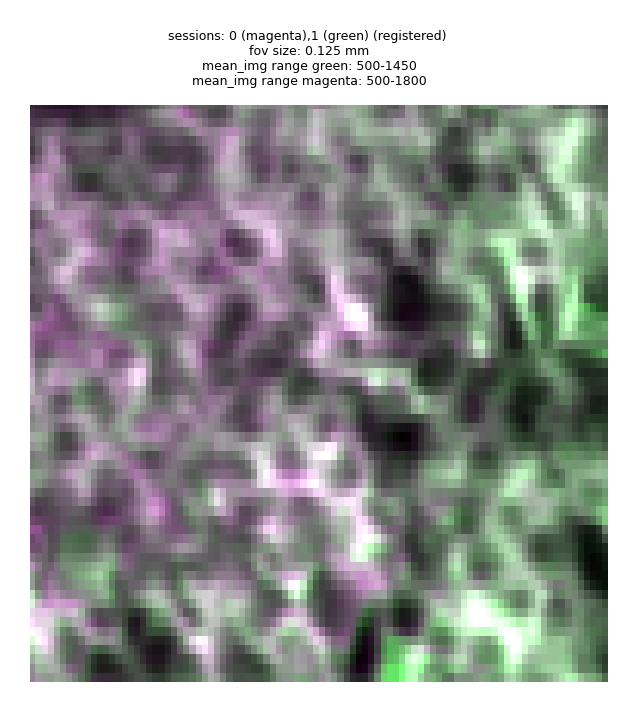

In [40]:
show_all_panels( session_1=0, session_2=1, 
                disp_range_1=[500,1450], disp_range_2= [500,1800], crop_origin_mm=[0.7, 1.25])

# Crop region 2.

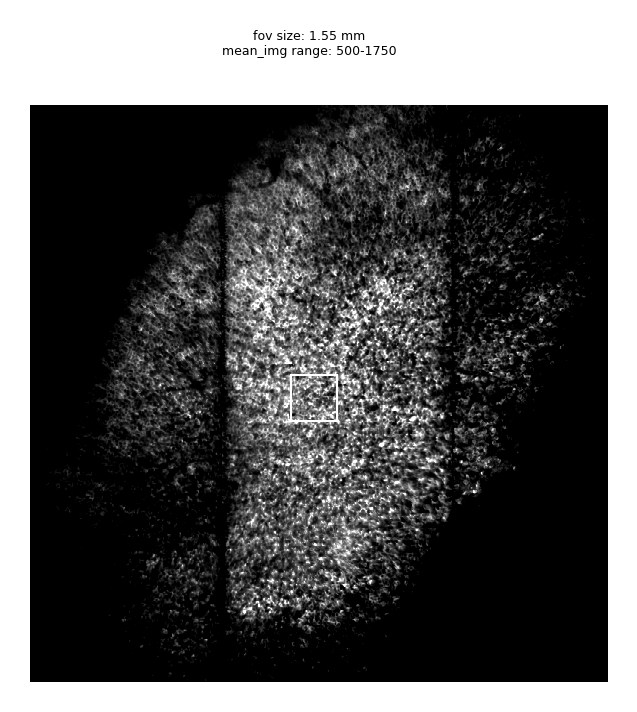

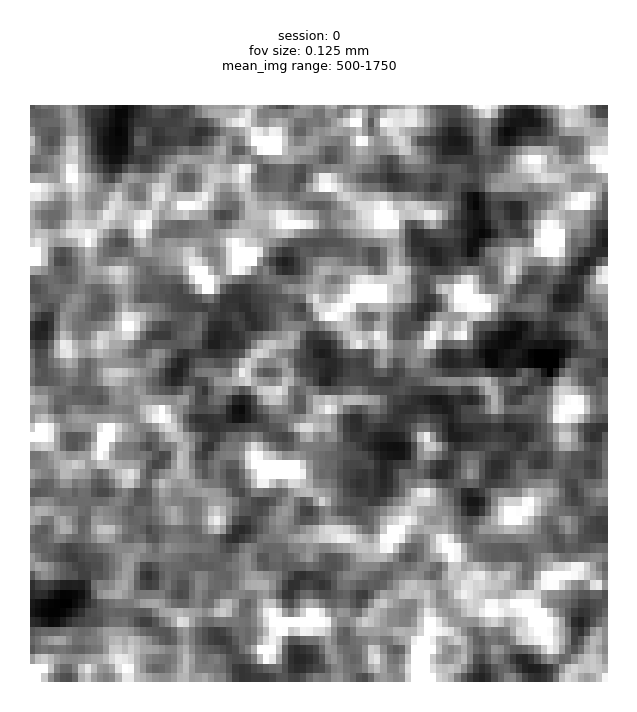

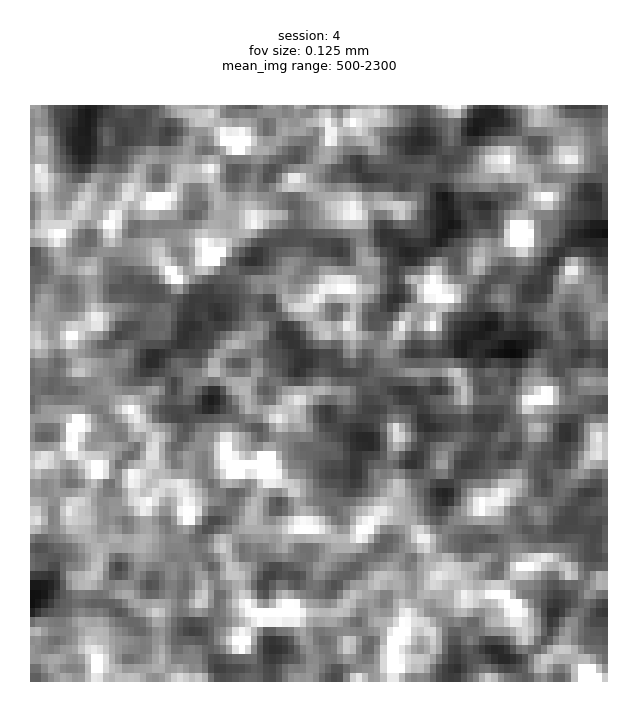

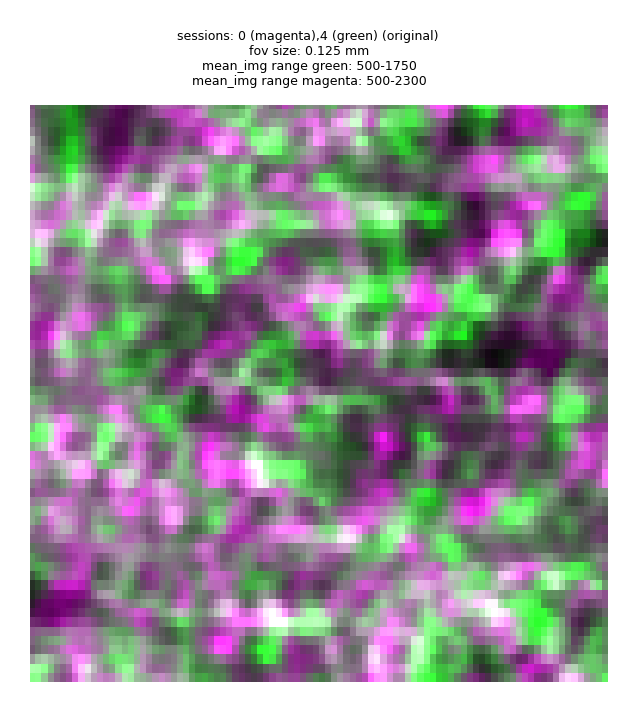

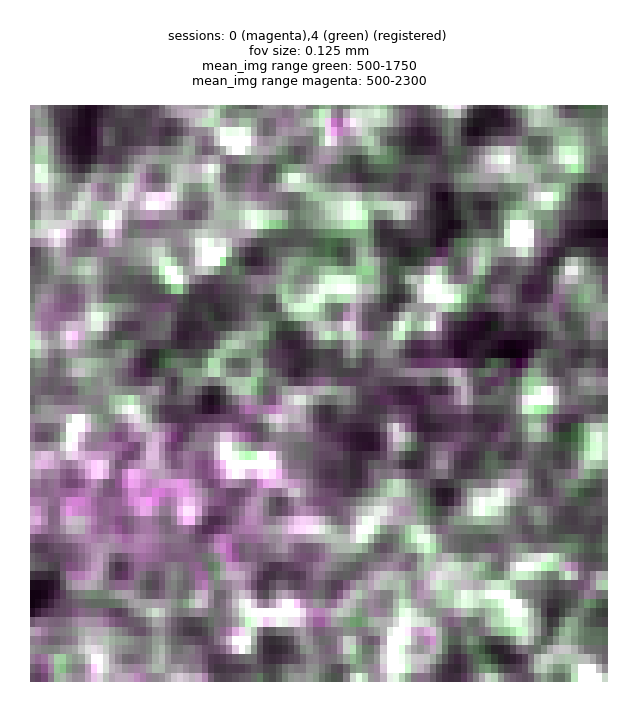

In [52]:
show_all_panels( session_1=0, session_2=4, 
                disp_range_1=[500,1750], disp_range_2= [500,2300], crop_origin_mm=[0.8, 0.75])

# Crop Region 3

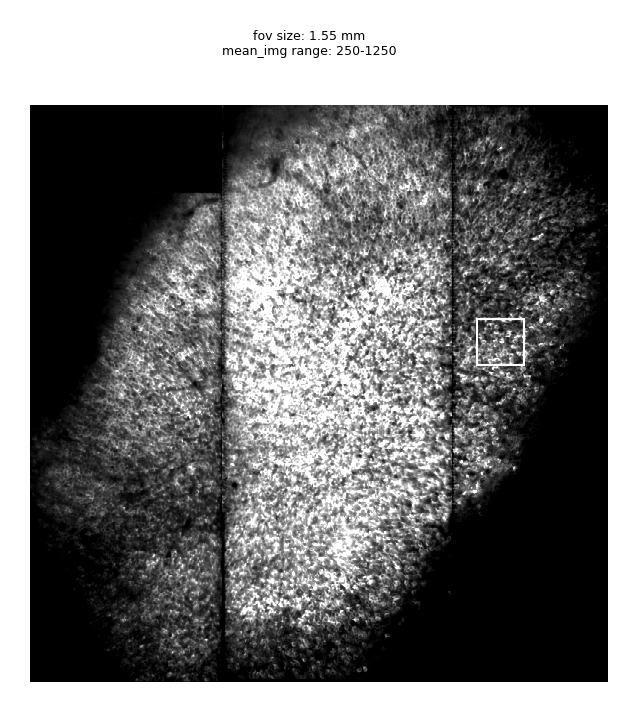

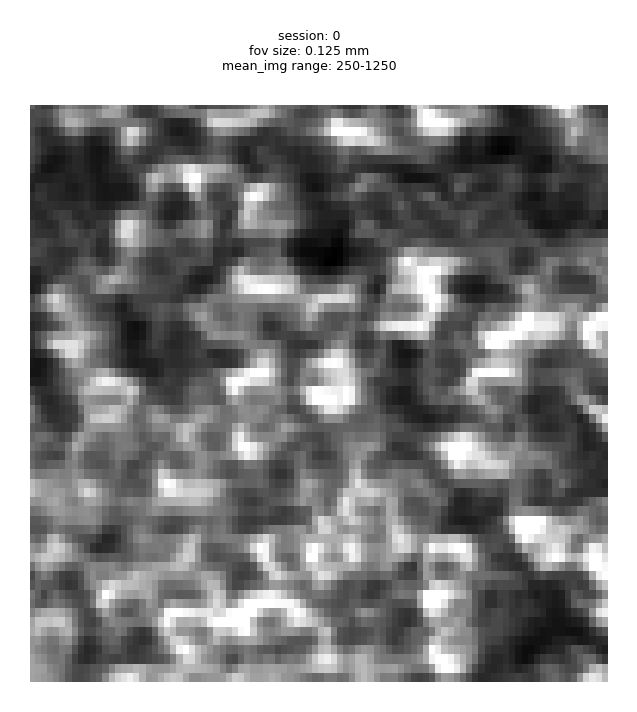

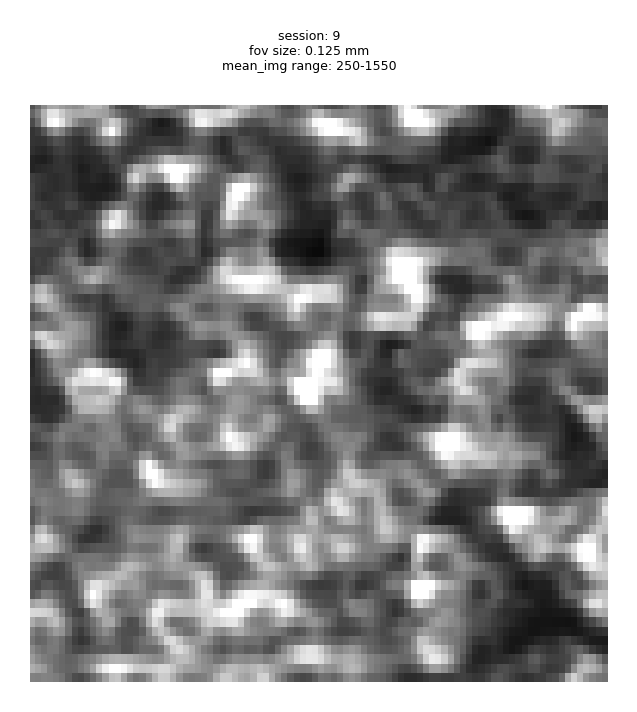

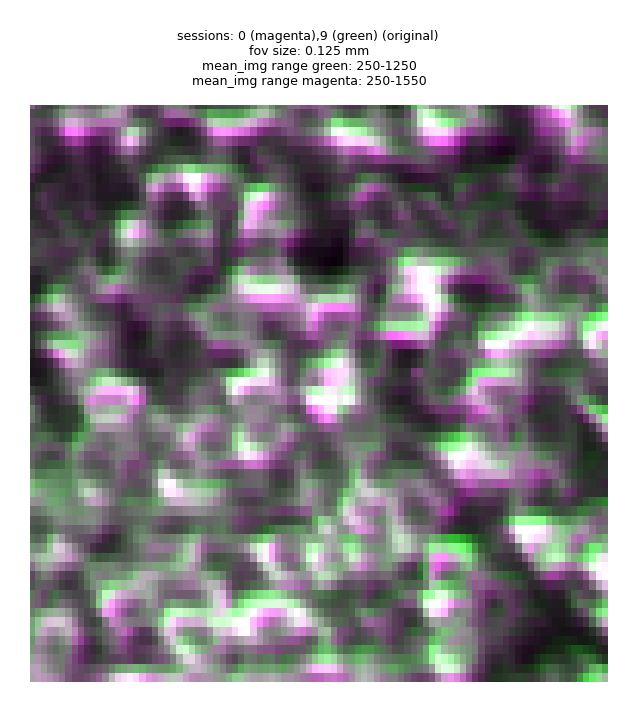

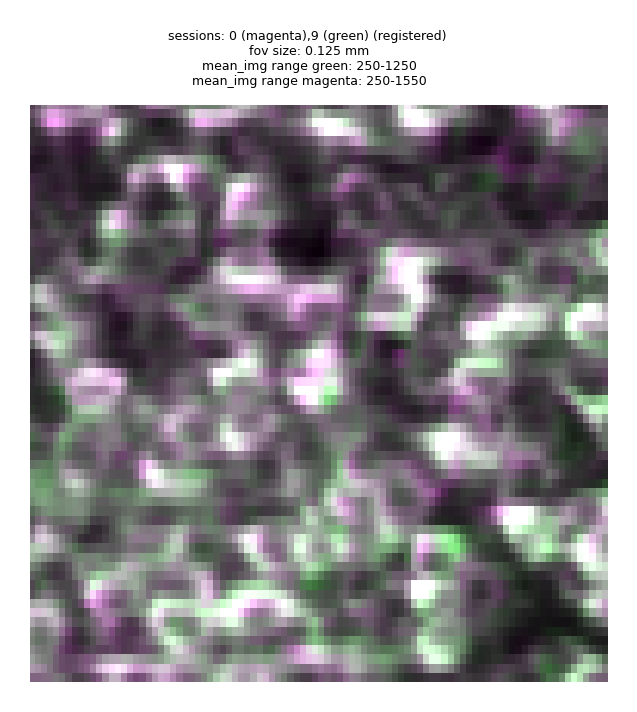

In [64]:
show_all_panels( session_1=0, session_2=9, 
                disp_range_1=[250,1250], disp_range_2= [250,1550], crop_origin_mm=[1.3, 0.9])